In [32]:
from Tools.scripts.dutree import display
from statistics import fmean
from unittest.mock import inplace

import pandas as pd
import numpy as np

In [33]:
data = pd.read_csv("C:/Users/nik/Desktop/ПРОГА/Titanik/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data.insert(4, 'sex_encoded', np.where(data['Sex'] == 'male', 1, 0))
data

,PassengerId,Survived,Pclass,Name,sex_encoded,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C


In [47]:
#Nan, missing values
data.isna().sum()
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
sex_encoded      0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
X = data[['Pclass', 'sex_encoded', 'Fare']]
Y = data[['Survived']]

In [38]:
data_test = pd.read_csv("C:/Users/nik/Desktop/ПРОГА/Titanik/test.csv")
#data_test.head()
data_test.isna().sum()
data_test.dropna(subset=['Fare'], inplace=True)
data_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [43]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
sex_encoded      0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [48]:
#разведочный анализ  EDA

In [170]:

data_f_s = data[['Survived', 'Pclass', 'sex_encoded', 'Fare', 'Age', 'PassengerId']]
data_f_s['Survived'].value_counts()
data_f_s



,Survived,Pclass,sex_encoded,Fare,Age,PassengerId
0,0,3,1,7.2500,22.0,1
1,1,1,0,71.2833,38.0,2
2,1,3,0,7.9250,26.0,3
3,1,1,0,53.1000,35.0,4
4,0,3,1,8.0500,35.0,5
...,...,...,...,...,...,...
886,0,2,1,13.0000,27.0,887
887,1,1,0,30.0000,19.0,888
888,0,3,0,23.4500,NaN,889
889,1,1,1,30.0000,26.0,890


In [114]:
target = 'Survived'

counts = data[target].value_counts()
round(counts[1]/counts.sum(), 3)

0.384

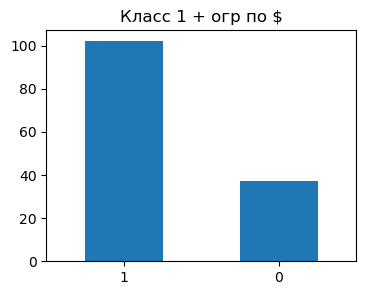

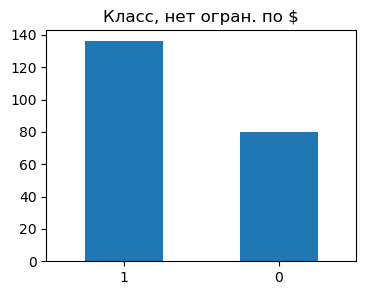

In [154]:
import matplotlib.pyplot as plt

data_1 = data.loc[(data['Pclass'] == 1) & (data['Fare'] > 50), ['Survived', 'Pclass', 'Sex']]
data_2 = data.loc[(data['Pclass'] == 1), ['Survived', 'Pclass', 'Sex']]
counts_1 = data_1[target].value_counts()
counts_2 = data_2[target].value_counts()
plt.figure(figsize=(4, 3))
plt.title('Класс 1 + огр по $')
counts_1.plot(kind='bar', rot=0)

plt.figure(figsize=(4, 3))
counts_2.plot(kind='bar', rot=0)
plt.title('Класс, нет огран. по $')
plt.show()


# Pclass, sex, Fare

In [156]:
data.duplicated().sum()

0

Index(['Pclass', 'Fare'], dtype='object')

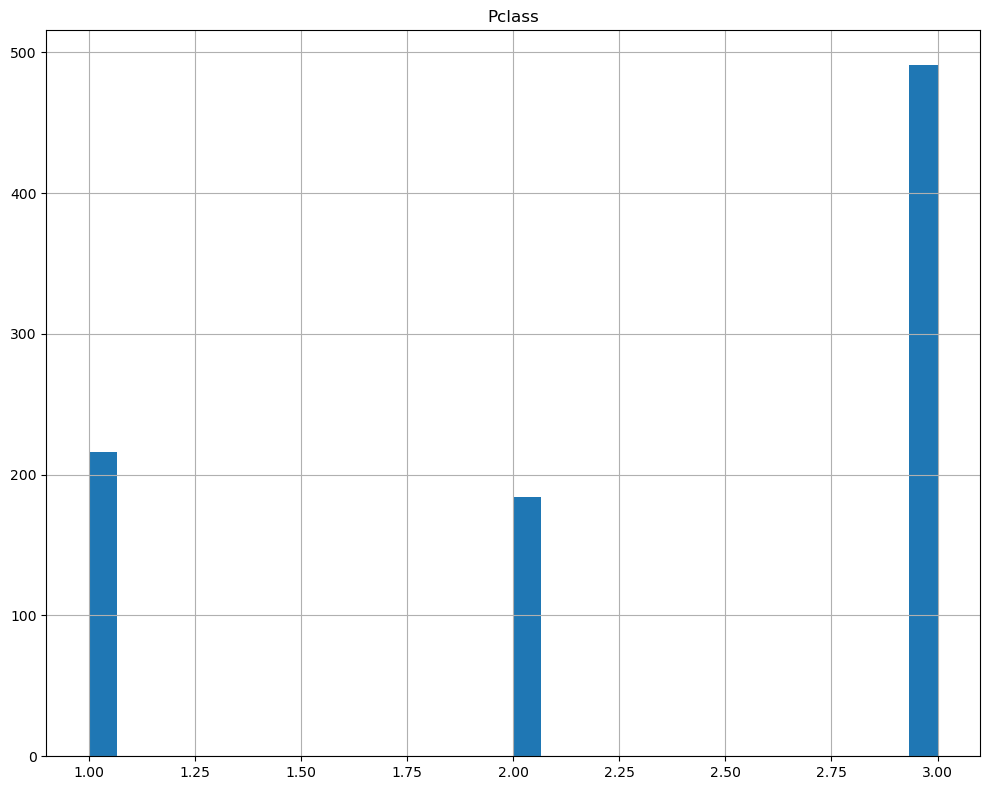

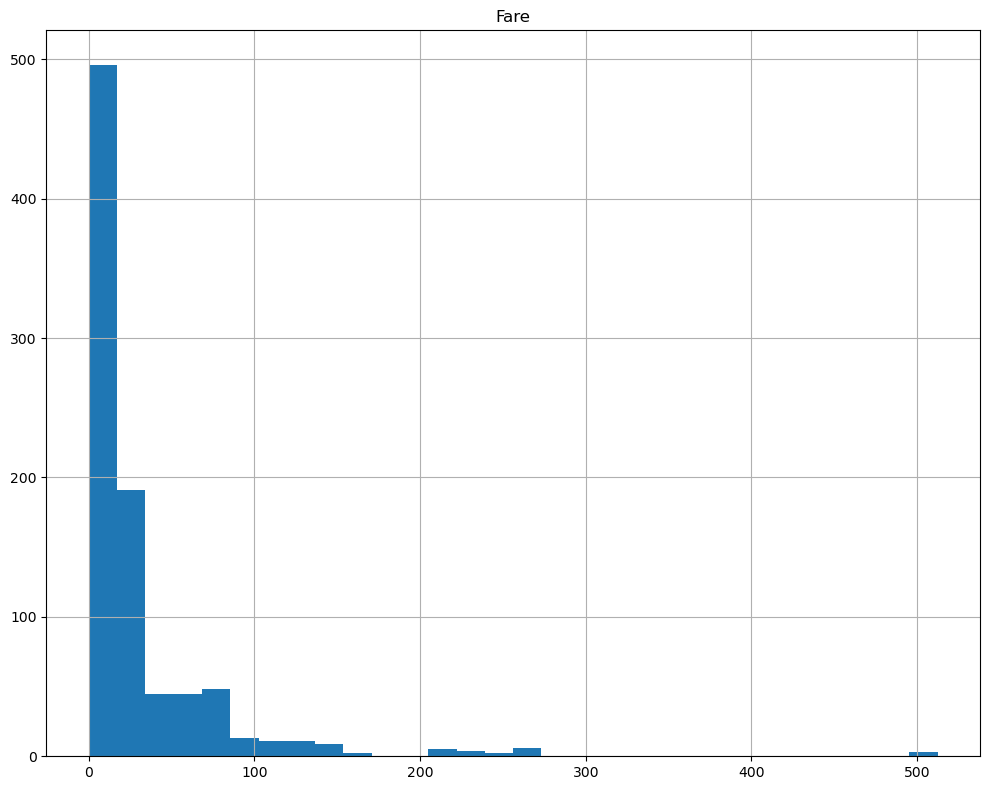

In [174]:
data_f_s
cols = data_f_s.columns.drop([target, 'sex_encoded', 'Age', 'PassengerId'])
display(cols)
for col in cols:
    plt.figure(figsize=(10, 8))
    data_f_s[col].hist(bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

<Figure size 1000x800 with 0 Axes>

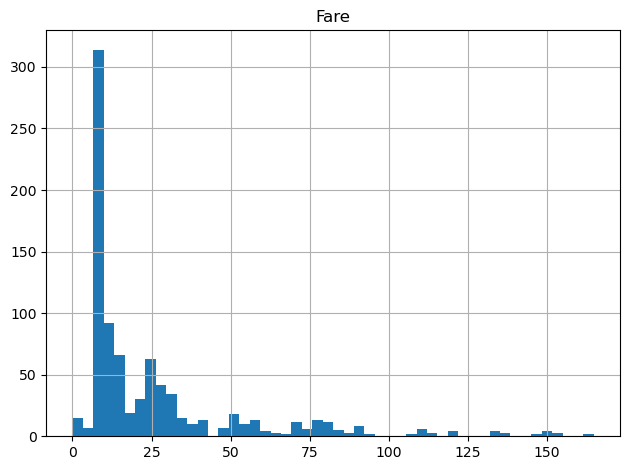

In [177]:
plt.figure(figsize=(10, 8))
data_f_s.loc[data_f_s['Fare'] <= 170 ,['Fare']].hist(bins=50)
plt.title(col)
plt.tight_layout()
plt.show()

In [183]:
data_f_s['Fare'].mode()
#['Fare'].std()

0    8.05
Name: Fare, dtype: float64

<Figure size 1000x800 with 0 Axes>

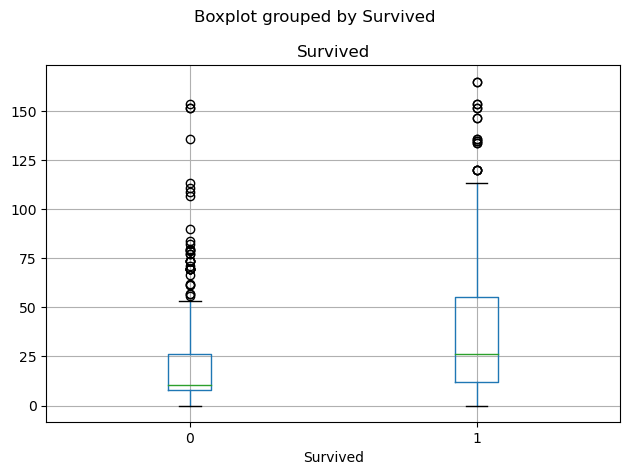

In [193]:
plt.figure(figsize=(10, 8))
data_f_s.loc[data_f_s['Fare'] <= 170 ,['Fare', 'Survived']].boxplot(column='Fare', by=target)
plt.title(target)
plt.tight_layout()
plt.show()

In [198]:
import seaborn as sns

plt.figure(figsize=(10, 8))
data_f_s.loc[data_f_s['Fare'] <= 170 ,['sex_encoded', 'Survived']].countplot(column='sex_encoded', by=target)
plt.title('sex_encoded')
# plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'countplot'

<Figure size 1000x800 with 0 Axes>